Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

In [4]:
df1=pd.read_csv("/content/drive/MyDrive/Great Learning/Predictive Modeling/Project/cubic_zirconia.csv")

1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [5]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df1.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [8]:
df1.shape

(26967, 11)

In [9]:
df1.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [10]:
df1_drop=df1.drop(["Unnamed: 0"],axis=1)

In [11]:
df1_drop.duplicated().sum()

34

In [12]:
df1_drop.shape

(26967, 10)

In [13]:
df1_drop.drop_duplicates(inplace=True)

In [14]:
df1_drop.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


Univariate Analysis

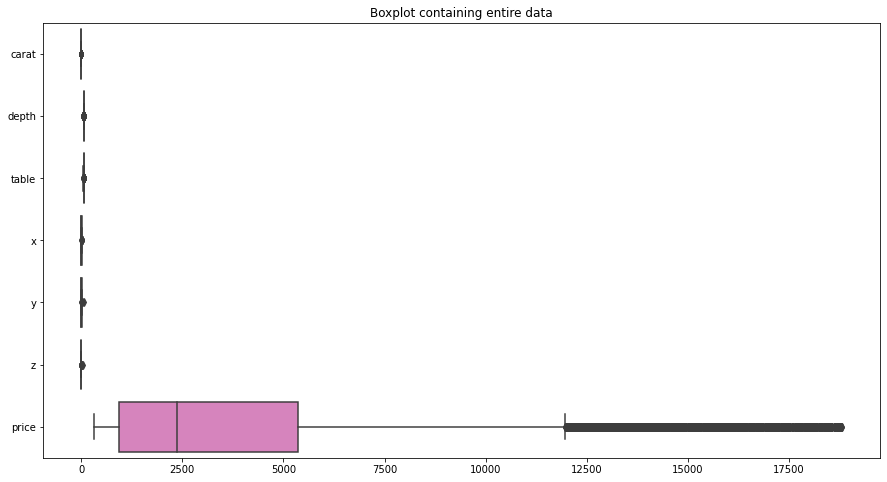

In [15]:
plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1_drop,orient="h");

In [16]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_drop[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1_drop[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1_drop[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df1_drop[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

In [17]:
df1_num = df1_drop.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns1 = list(df1_num.columns.values)
len(lstnumericcolumns1)

7

In [18]:
df1_num.head()

,carat,depth,table,x,y,z,price
0,0.30,62.1,58.0,4.27,4.29,2.66,499
1,0.33,60.8,58.0,4.42,4.46,2.70,984
2,0.90,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,60.4,59.0,4.35,4.43,2.65,779


In [19]:
df1_drop.skew(axis = 0, skipna = True).sort_values(ascending=False)

y        3.867764
z        2.580665
price    1.619116
carat    1.114789
table    0.765805
x        0.392290
depth   -0.026086
dtype: float64

Description of carat
----------------------------------------------------------------------------
count    26933.000000
mean         0.798010
std          0.477237
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64 Distribution of carat
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


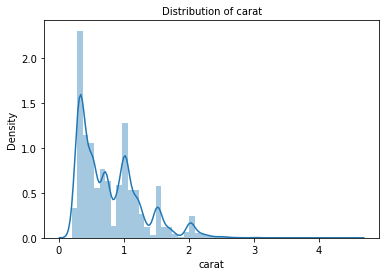

BoxPlot of carat
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


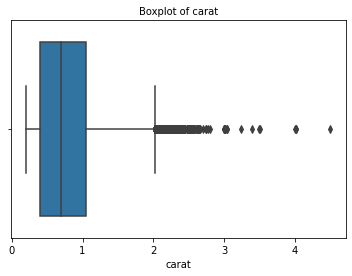

Histogram of carat
----------------------------------------------------------------------------


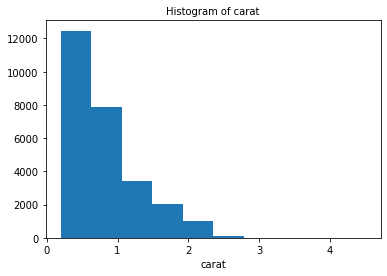

Description of depth
----------------------------------------------------------------------------
count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64 Distribution of depth
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


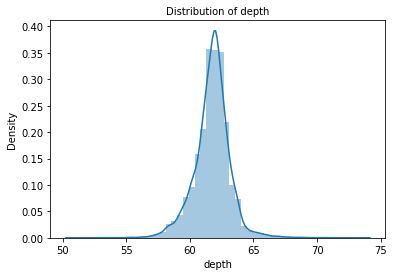

BoxPlot of depth
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


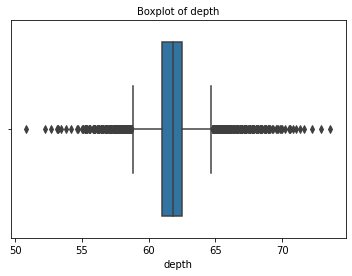

Histogram of depth
----------------------------------------------------------------------------


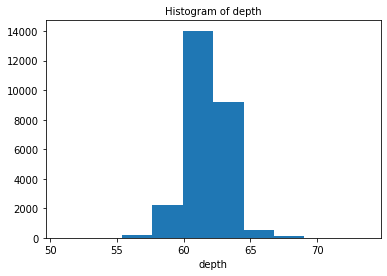

Description of table
----------------------------------------------------------------------------
count    26933.000000
mean        57.455950
std          2.232156
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64 Distribution of table
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


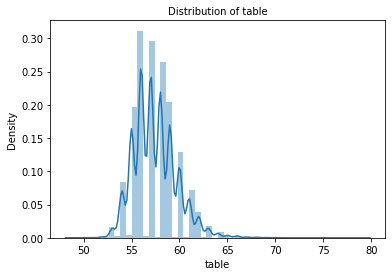

BoxPlot of table
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


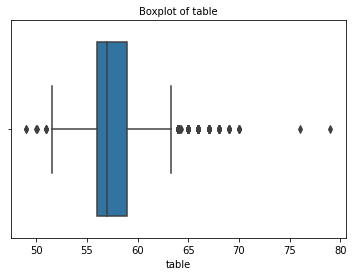

Histogram of table
----------------------------------------------------------------------------


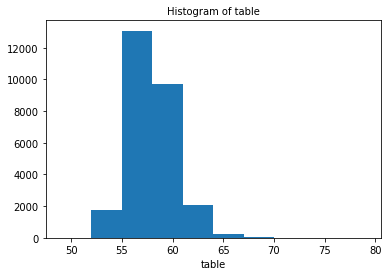

Description of x
----------------------------------------------------------------------------
count    26933.000000
mean         5.729346
std          1.127367
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64 Distribution of x
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


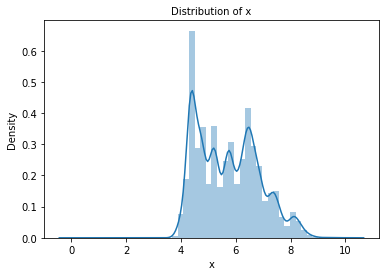

BoxPlot of x
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


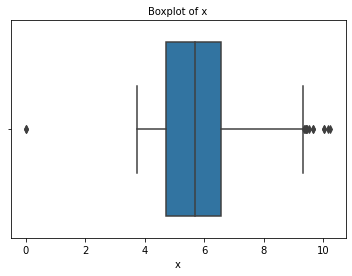

Histogram of x
----------------------------------------------------------------------------


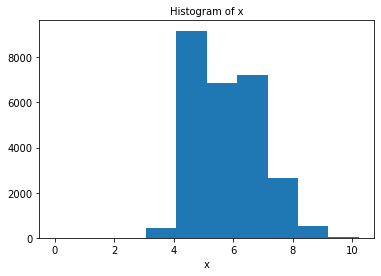

Description of y
----------------------------------------------------------------------------
count    26933.000000
mean         5.733102
std          1.165037
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64 Distribution of y
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


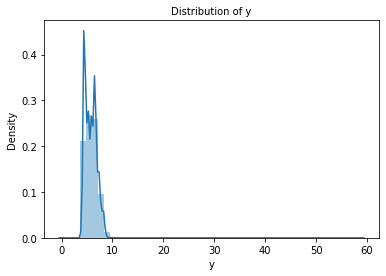

BoxPlot of y
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


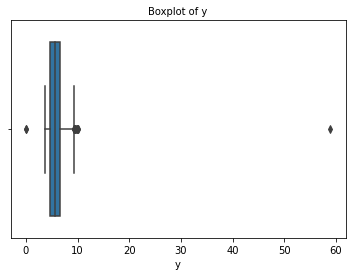

Histogram of y
----------------------------------------------------------------------------


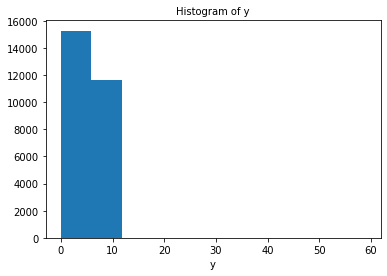

Description of z
----------------------------------------------------------------------------
count    26933.000000
mean         3.537769
std          0.719964
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64 Distribution of z
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


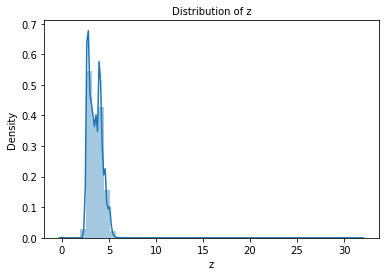

BoxPlot of z
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


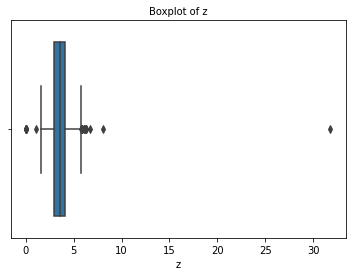

Histogram of z
----------------------------------------------------------------------------


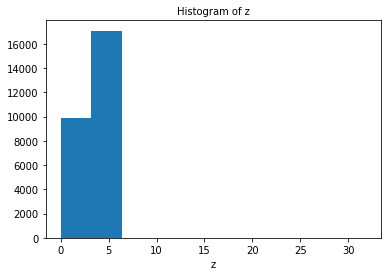

Description of price
----------------------------------------------------------------------------
count    26933.000000
mean      3937.526120
std       4022.551862
min        326.000000
25%        945.000000
50%       2375.000000
75%       5356.000000
max      18818.000000
Name: price, dtype: float64 Distribution of price
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


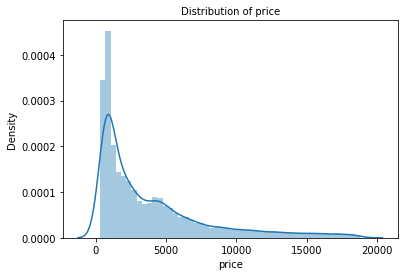

BoxPlot of price
----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


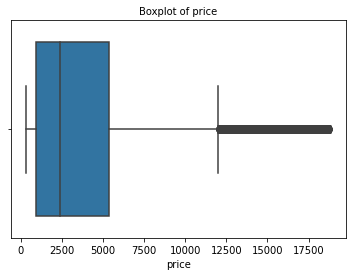

Histogram of price
----------------------------------------------------------------------------


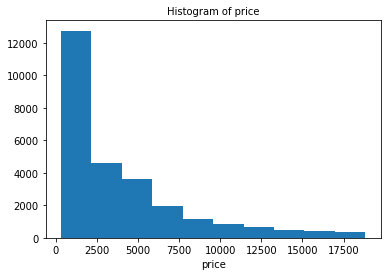

In [20]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,7)

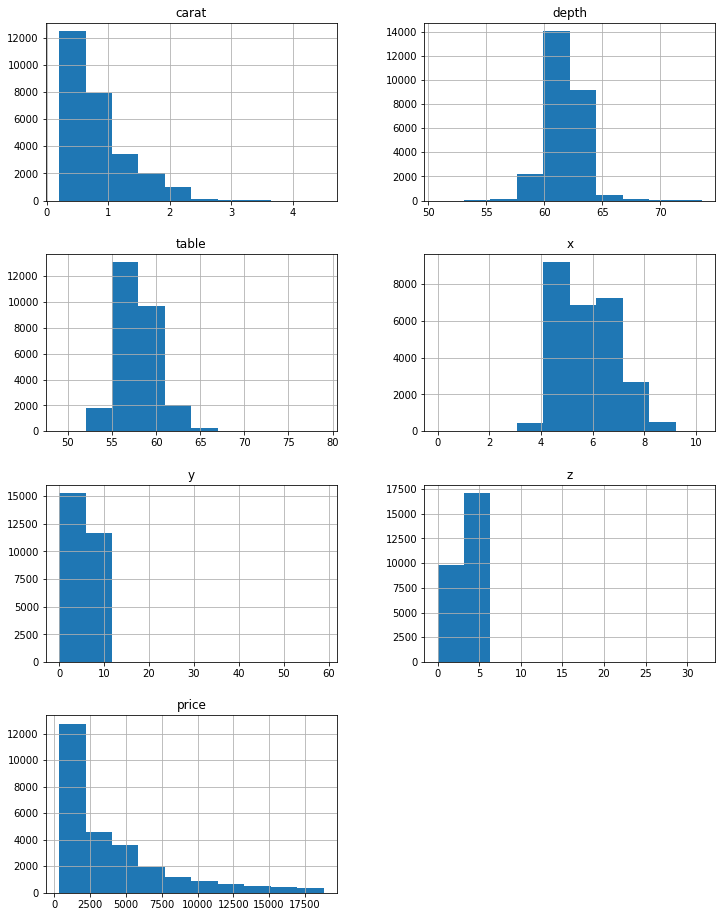

In [21]:
df1_drop.hist(figsize=(12,16),layout=(4,2));

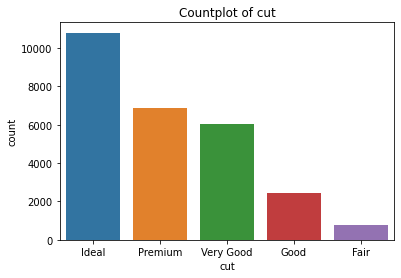

In [22]:
plt.title('Countplot of cut')
sns.countplot(data = df1_drop, x = 'cut')

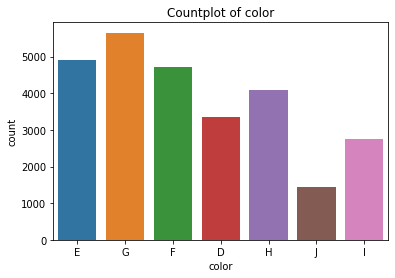

In [23]:
plt.title('Countplot of color')
sns.countplot(data = df1_drop, x = 'color')

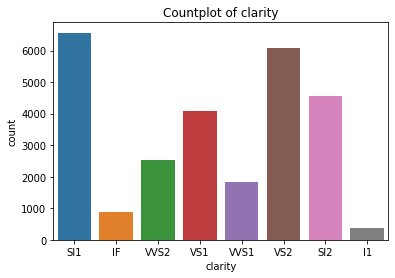

In [24]:
plt.title('Countplot of clarity')
sns.countplot(data = df1_drop, x = 'clarity')

Bivariate Analysis

In [25]:
corr1 = df1_num.corr(method='pearson')
corr1

,carat,depth,table,x,y,z,price
carat,1.000000,0.035240,0.181539,0.976858,0.941442,0.940982,0.922409
depth,0.035240,1.000000,-0.297768,-0.018401,-0.024453,0.101973,-0.002895
table,0.181539,-0.297768,1.000000,0.196254,0.182352,0.148994,0.126844
x,0.976858,-0.018401,0.196254,1.000000,0.962601,0.956490,0.886554
y,0.941442,-0.024453,0.182352,0.962601,1.000000,0.928725,0.856441
z,0.940982,0.101973,0.148994,0.956490,0.928725,1.000000,0.850682
price,0.922409,-0.002895,0.126844,0.886554,0.856441,0.850682,1.000000


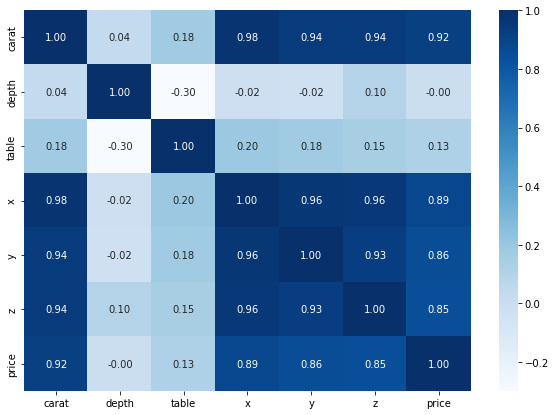

In [26]:
plt.figure(figsize=(10,7))
sns.heatmap(corr1, annot=True, fmt = '.2f', cmap="Blues")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


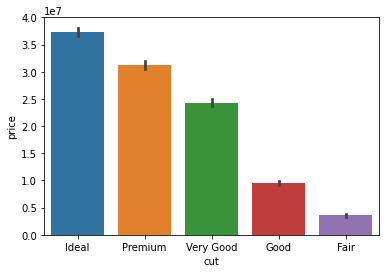

In [27]:
sns.barplot(df1_drop['cut'],df1_drop['price'],estimator=np.sum)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


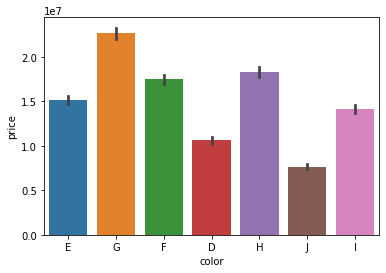

In [28]:
sns.barplot(df1_drop['color'],df1_drop['price'],estimator=np.sum)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


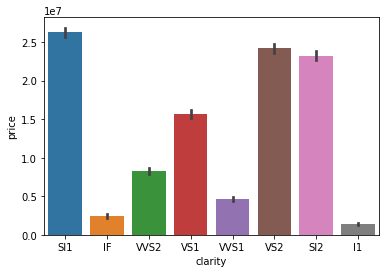

In [29]:
sns.barplot(df1_drop['clarity'],df1_drop['price'],estimator=np.sum)

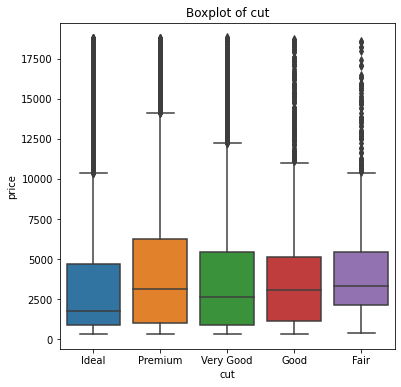

In [30]:
plt.figure(figsize=(6,6))
plt.title('Boxplot of cut')
sns.boxplot(data = df1, x='cut',y='price')

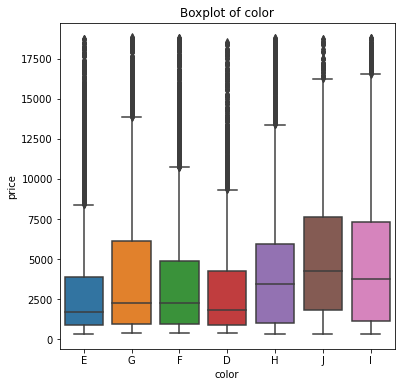

In [31]:
plt.figure(figsize=(6,6))
plt.title('Boxplot of color')
sns.boxplot(data = df1, x='color',y='price')

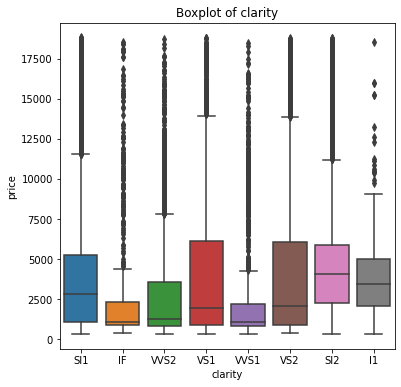

In [32]:
plt.figure(figsize=(6,6))
plt.title('Boxplot of clarity')
sns.boxplot(data = df1, x='clarity',y='price')

Multivariate Analysis

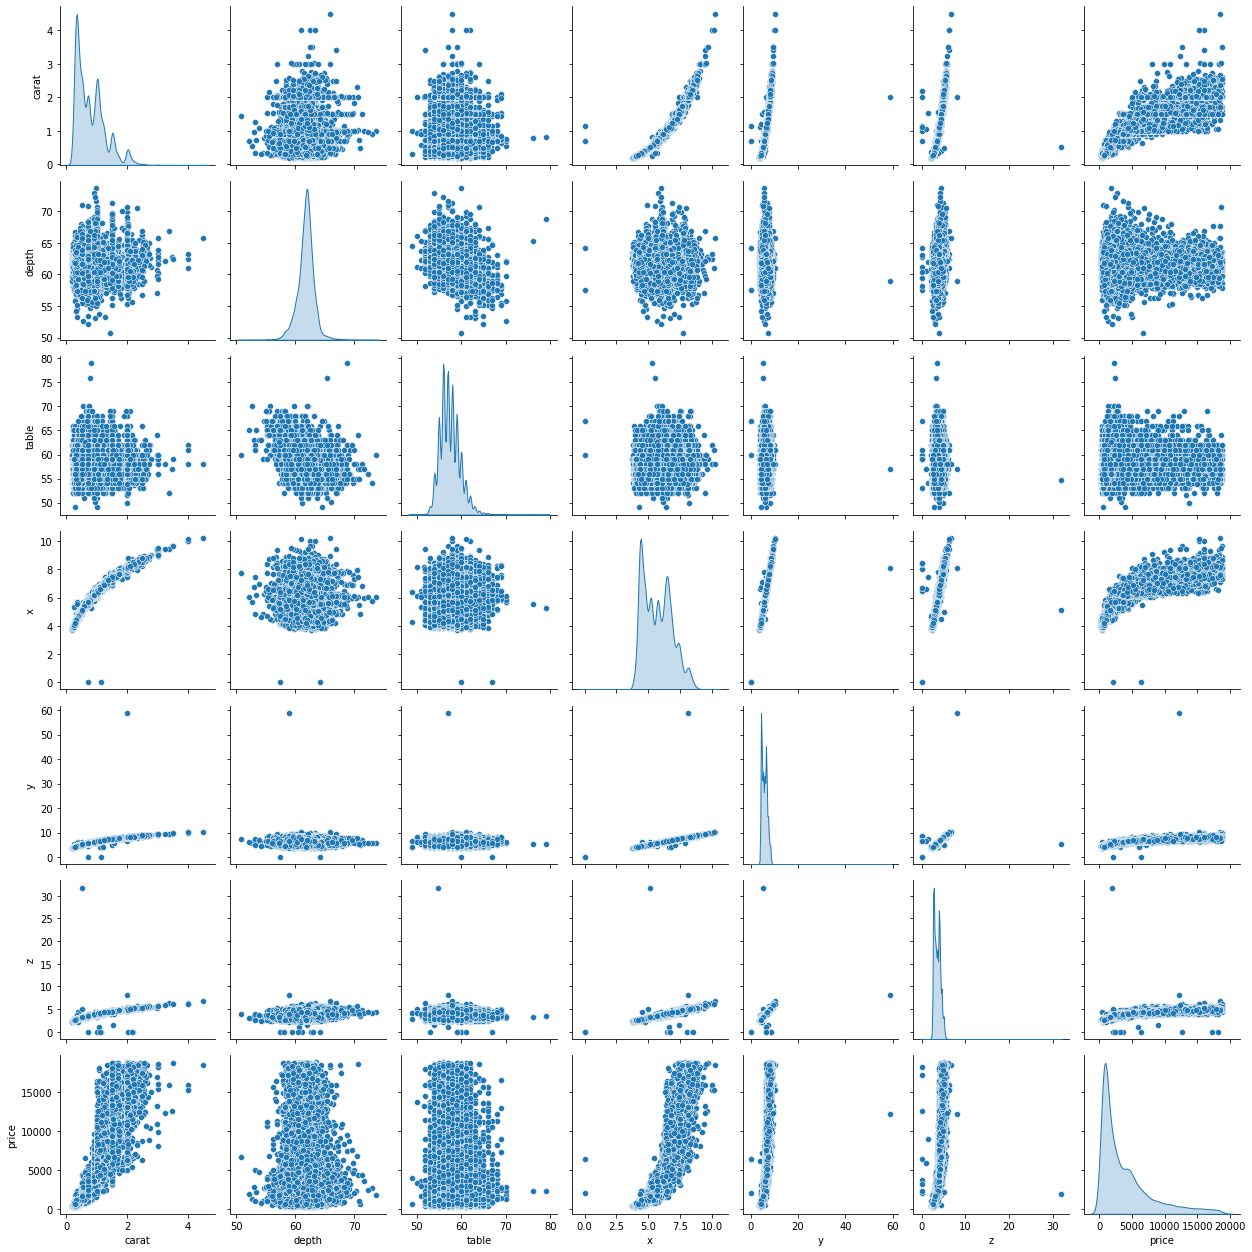

In [33]:
sns.pairplot(df1_drop, diag_kind='kde')
plt.tight_layout()

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [34]:
df1_drop.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [35]:
median=df1_drop["depth"].median()
df1_drop["depth"].replace(np.nan,median,inplace=True)

In [36]:
df1_drop.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [37]:
for column_name in df1_drop.columns:
  column = df1_drop[column_name]
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is: ', count)

Count of zeros in column  carat  is:  0
Count of zeros in column  cut  is:  0
Count of zeros in column  color  is:  0
Count of zeros in column  clarity  is:  0
Count of zeros in column  depth  is:  0
Count of zeros in column  table  is:  0
Count of zeros in column  x  is:  2
Count of zeros in column  y  is:  2
Count of zeros in column  z  is:  8
Count of zeros in column  price  is:  0


In [38]:
df1_drop['x']=np.where(df1_drop['x']==0,df1_drop["x"].median(),df1_drop['x'])
df1_drop['y']=np.where(df1_drop['y']==0,df1_drop["y"].median(),df1_drop['y'])
df1_drop['z']=np.where(df1_drop['z']==0,df1_drop["z"].median(),df1_drop['z'])

In [39]:
for column_name in df1_drop.columns:
  column = df1_drop[column_name]
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is: ', count)

Count of zeros in column  carat  is:  0
Count of zeros in column  cut  is:  0
Count of zeros in column  color  is:  0
Count of zeros in column  clarity  is:  0
Count of zeros in column  depth  is:  0
Count of zeros in column  table  is:  0
Count of zeros in column  x  is:  0
Count of zeros in column  y  is:  0
Count of zeros in column  z  is:  0
Count of zeros in column  price  is:  0


In [40]:
df1_drop['y']=np.where(df1_drop['y']==58.9,df1_drop["y"].median(),df1_drop['y'])
df1_drop['z']=np.where(df1_drop['z']==31.8,df1_drop["z"].median(),df1_drop['z'])

In [41]:
df1_drop.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.746701,57.455950,5.729769,5.731550,3.537765,3937.526120
std,0.477237,1.393875,2.232156,1.126285,1.117994,0.696400,4022.551862
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,10.160000,8.060000,18818.000000


In [42]:
for column in df1_drop.columns:
    if df1_drop[column].dtype == 'object':
        print(column.upper(),': ',df1_drop[column].nunique())
        print(df1_drop[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           780
Good          2435
Very Good     6027
Premium       6886
Ideal        10805
Name: cut, dtype: int64


COLOR :  7
J    1440
I    2765
D    3341
H    4095
F    4723
E    4916
G    5653
Name: color, dtype: int64


CLARITY :  8
I1       364
IF       891
VVS1    1839
VVS2    2530
VS1     4087
SI2     4564
VS2     6093
SI1     6565
Name: clarity, dtype: int64




In [43]:
df1_combine = df1_drop.copy()

In [44]:
df1_drop = df1_drop.replace({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df1_drop = df1_drop.replace({'J':7, 'I':6,'H':5,'G':4,'F':3,'E':2,'D':1})
df1_drop = df1_drop.replace({'I1':8, 'SI2':7,'SI1':6,'VS2':5,'VS1':4,'VVS2':3,'VVS1':2,'IF':1})
df1_drop.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779


In [45]:
df1_drop['cut'].value_counts()

5    10805
4     6886
3     6027
2     2435
1      780
Name: cut, dtype: int64

In [46]:
df1_drop['color'].value_counts()

4    5653
2    4916
3    4723
5    4095
1    3341
6    2765
7    1440
Name: color, dtype: int64

In [47]:
df1_drop['clarity'].value_counts()

6    6565
5    6093
7    4564
4    4087
3    2530
2    1839
1     891
8     364
Name: clarity, dtype: int64

In [48]:
df1_combine = df1_combine.replace({'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':1})
df1_combine = df1_combine.replace({'J':4, 'I':3,'H':3,'G':2,'F':2,'E':1,'D':1})
df1_combine = df1_combine.replace({'I1':5, 'SI2':4,'SI1':4,'VS2':3,'VS1':3,'VVS2':2,'VVS1':2,'IF':1})
df1_combine.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,4,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,2,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,2,2,60.4,59.0,4.35,4.43,2.65,779


In [49]:
df1_combine['cut'].value_counts()

4    10805
3     6886
2     6027
1     3215
Name: cut, dtype: int64

In [50]:
df1_combine['color'].value_counts()

2    10376
1     8257
3     6860
4     1440
Name: color, dtype: int64

In [51]:
df1_combine['clarity'].value_counts()

4    11129
3    10180
2     4369
1      891
5      364
Name: clarity, dtype: int64

In [52]:
df1_combine.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,4,1,4,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,2,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,2,1,2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,4,2,3,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,4,2,2,60.4,59.0,4.35,4.43,2.65,779


In [53]:
df1_drop.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Model building without combining the sub levels of ordinal variables

scikit learn

In [231]:
X = df1_drop.drop('price', axis=1)
y = df1_drop['price']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [233]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [234]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model.coef_[idx]))

The coefficient for carat is 11113.015235152121
The coefficient for cut is 116.82821221730455
The coefficient for color is -333.96821278390996
The coefficient for clarity is -499.8134377440133
The coefficient for depth is -17.496305203938242
The coefficient for table is -23.049959237648125
The coefficient for x is -2012.041277516459
The coefficient for y is 1636.639565290995
The coefficient for z is -991.4279415804899


In [235]:
 linear_model.coef_

array([11113.01523515,   116.82821222,  -333.96821278,  -499.81343774,
         -17.4963052 ,   -23.04995924, -2012.04127752,  1636.63956529,
        -991.42794158])

In [236]:
intercept = linear_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 6351.735739185806


In [237]:
linear_model.score(X_train, y_train)

0.9093303376203457

In [238]:
linear_model.score(X_test, y_test)

0.908779109283248

In [239]:
import math

In [240]:
mse_without_combine_train_lr = np.mean((linear_model.predict(X_train)-y_train)**2)
math.sqrt(mse_without_combine_train_lr)
print('RMSE train:', math.sqrt(mse_without_combine_train_lr))

RMSE train: 1207.3039449259259


In [241]:
mse_without_combine_test_lr = np.mean((linear_model.predict(X_test)-y_test)**2)
math.sqrt(mse_without_combine_test_lr)
print('RMSE test:', math.sqrt(mse_without_combine_test_lr))

RMSE test: 1224.0230643756115


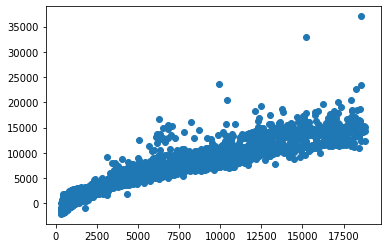

In [242]:
y_pred = linear_model.predict(X_test)
plt.scatter(y_test, y_pred)

stats model

In [243]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,3,5,5,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,5,2,5,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,5,4,6,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,2,2,7,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,4,3,7,61.1,62.0,6.54,6.49,3.98,4057


In [244]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept     6351.735739
carat        11113.015235
cut            116.828212
color         -333.968213
clarity       -499.813438
depth          -17.496305
table          -23.049959
x            -2012.041278
y             1636.639565
z             -991.427942
dtype: float64

In [245]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        11:12:03   Log-Likelihood:            -1.6053e+05
No. Observations:               18853   AIC:                         3.211e+05
Df Residuals:                   18843   BIC:                         3.212e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6351.7357    948.439      6.697      0.0

In [246]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [247]:
vif_without_combine = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [248]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_without_combine[i])
        i = i+1

carat ---> 89.62759639240456
cut ---> 17.308636569459697
color ---> 6.127824020749513
clarity ---> 12.367899652406432
depth ---> 1059.7090576557973
table ---> 797.09137724759
x ---> 10888.252698808254
y ---> 8836.136817601724
z ---> 3142.032299221565


Model building combining the sub levels of ordinal variables

scikit learn

In [110]:
X1 = df1_combine.drop('price', axis=1)
y1 = df1_combine['price']

In [111]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)

In [112]:
linear_model_combine = LinearRegression()
linear_model_combine.fit(X1_train, y1_train)

LinearRegression()

In [113]:
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model_combine.coef_[idx]))

The coefficient for carat is 11062.020191930626
The coefficient for cut is 98.84116571058883
The coefficient for color is -611.3928235427279
The coefficient for clarity is -897.6524587507201
The coefficient for depth is -28.31698801772922
The coefficient for table is -31.62443962400107
The coefficient for x is -2124.7818292157544
The coefficient for y is 1723.3930641483184
The coefficient for z is -987.8784627376036


In [114]:
linear_model_combine.coef_

array([11062.02019193,    98.84116571,  -611.39282354,  -897.65245875,
         -28.31698802,   -31.62443962, -2124.78182922,  1723.39306415,
        -987.87846274])

In [115]:
intercept_combine = linear_model_combine.intercept_

print("The intercept for our model is {}".format(intercept_combine))

The intercept for our model is 8318.014886555964


In [116]:
linear_model_combine.score(X1_train, y1_train)

0.9050077417696945

In [117]:
linear_model_combine.score(X1_test, y1_test)

0.9049388530007738

In [118]:
mse_combine_train_lr = np.mean((linear_model_combine.predict(X1_train)-y1_train)**2)
math.sqrt(mse_combine_train_lr)
print('RMSE train:', math.sqrt(mse_combine_train_lr))

RMSE train: 1235.747460132434


In [119]:
mse_combine_test_lr = np.mean((linear_model_combine.predict(X1_test)-y1_test)**2)
math.sqrt(mse_combine_test_lr)
print('RMSE test:', math.sqrt(mse_combine_test_lr))

RMSE test: 1249.5221873002079


stats model

In [120]:
data_train_combine = pd.concat([X1_train, y1_train], axis=1)
data_train_combine.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,2,3,3,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,4,1,3,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,4,2,4,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,4,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,3,2,4,61.1,62.0,6.54,6.49,3.98,4057


In [121]:
lm1_combine = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_combine).fit()
lm1_combine.params

Intercept     8318.014887
carat        11062.020192
cut             98.841166
color         -611.392824
clarity       -897.652459
depth          -28.316988
table          -31.624440
x            -2124.781829
y             1723.393064
z             -987.878463
dtype: float64

In [122]:
print(lm1_combine.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:26:51   Log-Likelihood:            -1.6097e+05
No. Observations:               18853   AIC:                         3.220e+05
Df Residuals:                   18843   BIC:                         3.220e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8318.0149    961.495      8.651      0.0

In [123]:
vif_combine = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [124]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_combine[i])
        i = i+1

carat ---> 89.62759639240456
cut ---> 17.308636569459697
color ---> 6.127824020749513
clarity ---> 12.367899652406432
depth ---> 1059.7090576557973
table ---> 797.09137724759
x ---> 10888.252698808254
y ---> 8836.136817601724
z ---> 3142.032299221565


In [251]:


print('Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine.score(X1_train, y1_train))
print('R-Squared test:',linear_model_combine.score(X1_test, y1_test))
print('RMSE train:', math.sqrt(mse_combine_train_lr))
print('RMSE test:', math.sqrt(mse_combine_test_lr))
print('Adjusted R-Squared: 0.905')

Linear Regression model without combining the sub levels of ordinal variables:
R-Squared train: 0.9093303376203457
R-Squared test: 0.908779109283248
RMSE train: 1207.3039449259259
RMSE test: 1224.0230643756115
Adjusted R-Squared: 0.909

Linear Regression model combining the sub levels of ordinal variables:
R-Squared train: 0.9050077417696945
R-Squared test: 0.9049388530007738
RMSE train: 1235.747460132434
RMSE test: 1249.5221873002079
Adjusted R-Squared: 0.905


Scaled model

scikit learn

In [229]:
from scipy.stats import zscore

In [126]:
df1_combine_scaled=df1_combine.apply(zscore)
df1_combine_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.043547,1.012555,-1.200708,0.930818,0.253470,0.243737,-1.296116,-1.289431,-1.260456,-0.854828
1,-0.980684,0.058518,-0.062664,-2.612272,-0.679199,0.243737,-1.162932,-1.137370,-1.203017,-0.734256
2,0.213713,-0.895518,-1.200708,-1.431242,0.325214,1.139749,0.275452,0.347459,0.347846,0.584584
3,-0.792095,1.012555,-0.062664,-0.250212,-0.105249,-0.652274,-0.807776,-0.833249,-0.829661,-0.709892
4,-1.022593,1.012555,-0.062664,-1.431242,-0.966174,0.691743,-1.225085,-1.164205,-1.274816,-0.785219


In [227]:
df1_combine.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,2.938663,2.055063,3.211859,61.746701,57.455950,5.729769,5.731550,3.537765,3937.526120
std,0.477237,1.048197,0.878716,0.846734,1.393875,2.232156,1.126285,1.117994,0.696400,4022.551862
min,0.200000,1.000000,1.000000,1.000000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,2.000000,1.000000,3.000000,61.100000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,3.000000,2.000000,3.000000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,4.000000,3.000000,4.000000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,4.000000,4.000000,5.000000,73.600000,79.000000,10.230000,10.160000,8.060000,18818.000000


In [228]:
df1_combine_scaled.describe()

,carat,cut,color,clarity,depth,table,x,y,z,price
count,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04,2.693300e+04
mean,6.794979e-17,-2.013281e-16,4.237587e-17,-5.163961e-16,1.612401e-15,-2.574881e-15,-9.027297e-16,-4.386480e-16,1.531137e-16,-1.112985e-19
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.253091e+00,-1.849555e+00,-1.200708e+00,-2.612272e+00,-7.853574e+00,-3.788313e+00,-1.775577e+00,-1.808227e+00,-3.543671e+00,-8.978363e-01
25%,-8.340039e-01,-8.955183e-01,-1.200708e+00,-2.502119e-01,-4.639676e-01,-6.522737e-01,-9.054438e-01,-9.048067e-01,-9.158200e-01,-7.439510e-01
50%,-2.053739e-01,5.851811e-02,-6.266366e-02,-2.502119e-01,3.823865e-02,-2.042681e-01,-3.531027e-02,-2.822050e-02,-2.551000e-02,-3.884487e-01
75%,5.280277e-01,1.012555e+00,1.075381e+00,9.308182e-01,5.404449e-01,6.917430e-01,7.282763e-01,7.231391e-01,7.212016e-01,3.526369e-01
max,7.757273e+00,1.012555e+00,2.213426e+00,2.111848e+00,8.504002e+00,9.651855e+00,3.995716e+00,3.961141e+00,6.493857e+00,3.699331e+00


In [127]:
X1_scaled = df1_combine_scaled.drop('price', axis=1)
y1_scaled = df1_combine_scaled['price']

In [128]:
X1_train_scaled, X1_test_scaled, y1_train_scaled, y1_test_scaled = train_test_split(X1_scaled, y1_scaled, test_size=0.30 , random_state=1)

In [129]:
linear_model_combine_scaled = LinearRegression()
linear_model_combine_scaled.fit(X1_train_scaled, y1_train_scaled)

LinearRegression()

In [130]:
for idx, col_name in enumerate(X1_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model_combine_scaled.coef_[idx]))

The coefficient for carat is 1.312402403431688
The coefficient for cut is 0.025756052855796546
The coefficient for color is -0.13355723444478676
The coefficient for clarity is -0.18895293750800624
The coefficient for depth is -0.009812267287761415
The coefficient for table is -0.01754873540226526
The coefficient for x is -0.5949232395882987
The coefficient for y is 0.4789853369172661
The coefficient for z is -0.17102529688534732


In [131]:
intercept_combine_scaled = linear_model_combine_scaled.intercept_

print("The intercept for our scaled model is {}".format(intercept_combine_scaled))

The intercept for our scaled model is 0.0004478928342919454


In [132]:
linear_model_combine_scaled.score(X1_train_scaled, y1_train_scaled)

0.9050077417696946

In [133]:
linear_model_combine_scaled.score(X1_test_scaled, y1_test_scaled)

0.9049388530007738

In [134]:
mse_combine_train_lr_scaled = np.mean((linear_model_combine_scaled.predict(X1_train_scaled)-y1_train_scaled)**2)
math.sqrt(mse_combine_train_lr_scaled)
print('RMSE train:', math.sqrt(mse_combine_train_lr_scaled))

RMSE train: 0.30721055793092117


In [135]:
mse_combine_test_lr_scaled = np.mean((linear_model_combine_scaled.predict(X1_test_scaled)-y1_test_scaled)**2)
math.sqrt(mse_combine_test_lr_scaled)
print('RMSE test:', math.sqrt(mse_combine_test_lr_scaled))

RMSE test: 0.31063499678682394


stats model

In [136]:
data_train_combine_scaled = pd.concat([X1_train_scaled, y1_train_scaled], axis=1)
data_train_combine_scaled.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
22114,-0.959730,-0.895518,1.075381,-0.250212,0.468701,1.139749,-1.171811,-1.155260,-1.116858,-0.845381
2275,-1.043547,1.012555,-1.200708,-0.250212,-0.392224,-1.100279,-1.225085,-1.271542,-1.274816,-0.769060
19183,-0.624461,1.012555,-0.062664,0.930818,0.540445,-0.204268,-0.568045,-0.609630,-0.528104,-0.670613
5030,0.632799,-1.849555,-1.200708,0.930818,1.114395,-0.652274,0.710518,0.758918,0.879160,0.031690
25414,0.465165,0.058518,-0.062664,0.930818,-0.463968,2.035760,0.719397,0.678415,0.635043,0.029702


In [137]:
lm1_combine_scaled = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_combine_scaled).fit()
lm1_combine_scaled.params

Intercept    0.000448
carat        1.312402
cut          0.025756
color       -0.133557
clarity     -0.188953
depth       -0.009812
table       -0.017549
x           -0.594923
y            0.478985
z           -0.171025
dtype: float64

In [138]:
print(lm1_combine_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.995e+04
Date:                Wed, 26 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:27:11   Log-Likelihood:                -4500.5
No. Observations:               18853   AIC:                             9021.
Df Residuals:                   18843   BIC:                             9099.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.002      0.200      0.8

In [139]:
vif_combine_scaled = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [140]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_combine_scaled[i])
        i = i+1



carat ---> 89.62759639240456
cut ---> 17.308636569459697
color ---> 6.127824020749513
clarity ---> 12.367899652406432
depth ---> 1059.7090576557973
table ---> 797.09137724759
x ---> 10888.252698808254
y ---> 8836.136817601724
z ---> 3142.032299221565


In [141]:
print('Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine.score(X1_train, y1_train))
print('R-Squared test:',linear_model_combine.score(X1_test, y1_test))
print('RMSE train:', math.sqrt(mse_combine_train_lr))
print('RMSE test:', math.sqrt(mse_combine_test_lr))
print('Adjusted R-Squared: 0.905')
print('')
print('Scaled Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine_scaled.score(X1_train_scaled, y1_train_scaled))
print('R-Squared test:',linear_model_combine_scaled.score(X1_test_scaled, y1_test_scaled))
print('RMSE train:', math.sqrt(mse_combine_train_lr_scaled))
print('RMSE test:', math.sqrt(mse_combine_test_lr_scaled))
print('Adjusted R-Squared: 0.905')

Linear Regression model combining the sub levels of ordinal variables:
R-Squared train: 0.9050077417696945
R-Squared test: 0.9049388530007738
RMSE train: 1235.747460132434
RMSE test: 1249.5221873002079
Adjusted R-Squared: 0.905

Scaled Linear Regression model combining the sub levels of ordinal variables:
R-Squared train: 0.9050077417696946
R-Squared test: 0.9049388530007738
RMSE train: 0.30721055793092117
RMSE test: 0.31063499678682394
Adjusted R-Squared: 0.905


1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

In [ ]:
Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale

df1=pd.read_csv("/content/drive/MyDrive/Great Learning/Predictive Modeling/Project/cubic_zirconia.csv")

1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

df1.head()

df1.info()

df1.dtypes

df1.shape

df1.isnull().sum()

df1_drop=df1.drop(["Unnamed: 0"],axis=1)

df1_drop.duplicated().sum()

df1_drop.shape

df1_drop.drop_duplicates(inplace=True)

df1_drop.describe()

Univariate Analysis

plt.figure(figsize=(15,8))
plt.title("Boxplot containing entire data")
sns.boxplot(data=df1_drop,orient="h");

def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_drop[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1_drop[column], kde=True);
    plt.title("Distribution of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1_drop[column], orient = "v")
    plt.title("Boxplot of " + column,fontsize=10)
    plt.show()
    
    plt.figure()
    print("Histogram of " + column)
    print("----------------------------------------------------------------------------")
    ax1 = plt.hist(x=df1_drop[column])
    plt.title("Histogram of " + column,fontsize=10)
    plt.xlabel("" + column, fontsize=10)
    plt.show()

df1_num = df1_drop.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns1 = list(df1_num.columns.values)
len(lstnumericcolumns1)

df1_num.head()

df1_drop.skew(axis = 0, skipna = True).sort_values(ascending=False)

for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,7)

df1_drop.hist(figsize=(12,16),layout=(4,2));

plt.title('Countplot of cut')
sns.countplot(data = df1_drop, x = 'cut')

plt.title('Countplot of color')
sns.countplot(data = df1_drop, x = 'color')

plt.title('Countplot of clarity')
sns.countplot(data = df1_drop, x = 'clarity')

Bivariate Analysis

corr1 = df1_num.corr(method='pearson')
corr1

plt.figure(figsize=(10,7))
sns.heatmap(corr1, annot=True, fmt = '.2f', cmap="Blues")

sns.barplot(df1_drop['cut'],df1_drop['price'],estimator=np.sum)

sns.barplot(df1_drop['color'],df1_drop['price'],estimator=np.sum)

sns.barplot(df1_drop['clarity'],df1_drop['price'],estimator=np.sum)

plt.figure(figsize=(6,6))
plt.title('Boxplot of cut')
sns.boxplot(data = df1, x='cut',y='price')

plt.figure(figsize=(6,6))
plt.title('Boxplot of color')
sns.boxplot(data = df1, x='color',y='price')

plt.figure(figsize=(6,6))
plt.title('Boxplot of clarity')
sns.boxplot(data = df1, x='clarity',y='price')

Multivariate Analysis

sns.pairplot(df1_drop, diag_kind='kde')
plt.tight_layout()

1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

df1_drop.isnull().sum()

median=df1_drop["depth"].median()
df1_drop["depth"].replace(np.nan,median,inplace=True)

df1_drop.isnull().sum()

for column_name in df1_drop.columns:
  column = df1_drop[column_name]
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is: ', count)

df1_drop['x']=np.where(df1_drop['x']==0,df1_drop["x"].median(),df1_drop['x'])
df1_drop['y']=np.where(df1_drop['y']==0,df1_drop["y"].median(),df1_drop['y'])
df1_drop['z']=np.where(df1_drop['z']==0,df1_drop["z"].median(),df1_drop['z'])

for column_name in df1_drop.columns:
  column = df1_drop[column_name]
  count = (column == 0).sum()
  print('Count of zeros in column ', column_name, ' is: ', count)

df1_drop['y']=np.where(df1_drop['y']==58.9,df1_drop["y"].median(),df1_drop['y'])
df1_drop['z']=np.where(df1_drop['z']==31.8,df1_drop["z"].median(),df1_drop['z'])

df1_drop.describe()

for column in df1_drop.columns:
    if df1_drop[column].dtype == 'object':
        print(column.upper(),': ',df1_drop[column].nunique())
        print(df1_drop[column].value_counts().sort_values())
        print('\n')

df1_combine = df1_drop.copy()

df1_drop = df1_drop.replace({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})
df1_drop = df1_drop.replace({'J':7, 'I':6,'H':5,'G':4,'F':3,'E':2,'D':1})
df1_drop = df1_drop.replace({'I1':8, 'SI2':7,'SI1':6,'VS2':5,'VS1':4,'VVS2':3,'VVS1':2,'IF':1})
df1_drop.head()

df1_drop['cut'].value_counts()

df1_drop['color'].value_counts()

df1_drop['clarity'].value_counts()

df1_combine = df1_combine.replace({'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':1})
df1_combine = df1_combine.replace({'J':4, 'I':3,'H':3,'G':2,'F':2,'E':1,'D':1})
df1_combine = df1_combine.replace({'I1':5, 'SI2':4,'SI1':4,'VS2':3,'VS1':3,'VVS2':2,'VVS1':2,'IF':1})
df1_combine.head()

df1_combine['cut'].value_counts()

df1_combine['color'].value_counts()

df1_combine['clarity'].value_counts()

df1_combine.head()

df1_drop.dtypes

1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Model building without combining the sub levels of ordinal variables

scikit learn

X = df1_drop.drop('price', axis=1)
y = df1_drop['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model.coef_[idx]))

 linear_model.coef_

intercept = linear_model.intercept_

print("The intercept for our model is {}".format(intercept))

linear_model.score(X_train, y_train)

linear_model.score(X_test, y_test)

import math

mse_without_combine_train_lr = np.mean((linear_model.predict(X_train)-y_train)**2)
math.sqrt(mse_without_combine_train_lr)
print('RMSE train:', math.sqrt(mse_without_combine_train_lr))

mse_without_combine_test_lr = np.mean((linear_model.predict(X_test)-y_test)**2)
math.sqrt(mse_without_combine_test_lr)
print('RMSE test:', math.sqrt(mse_without_combine_test_lr))

y_pred = linear_model.predict(X_test)
plt.scatter(y_test, y_pred)

stats model

data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

print(lm1.summary())

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_without_combine = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_without_combine[i])
        i = i+1

Model building combining the sub levels of ordinal variables

scikit learn

X1 = df1_combine.drop('price', axis=1)
y1 = df1_combine['price']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30 , random_state=1)

linear_model_combine = LinearRegression()
linear_model_combine.fit(X1_train, y1_train)

for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model_combine.coef_[idx]))

linear_model_combine.coef_

intercept_combine = linear_model_combine.intercept_

print("The intercept for our model is {}".format(intercept_combine))

linear_model_combine.score(X1_train, y1_train)

linear_model_combine.score(X1_test, y1_test)

mse_combine_train_lr = np.mean((linear_model_combine.predict(X1_train)-y1_train)**2)
math.sqrt(mse_combine_train_lr)
print('RMSE train:', math.sqrt(mse_combine_train_lr))

mse_combine_test_lr = np.mean((linear_model_combine.predict(X1_test)-y1_test)**2)
math.sqrt(mse_combine_test_lr)
print('RMSE test:', math.sqrt(mse_combine_test_lr))

stats model

data_train_combine = pd.concat([X1_train, y1_train], axis=1)
data_train_combine.head()

lm1_combine = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_combine).fit()
lm1_combine.params

print(lm1_combine.summary())

vif_combine = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_combine[i])
        i = i+1



print('Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine.score(X1_train, y1_train))
print('R-Squared test:',linear_model_combine.score(X1_test, y1_test))
print('RMSE train:', math.sqrt(mse_combine_train_lr))
print('RMSE test:', math.sqrt(mse_combine_test_lr))
print('Adjusted R-Squared: 0.905')

Scaled model

scikit learn

from scipy.stats import zscore

df1_combine_scaled=df1_combine.apply(zscore)
df1_combine_scaled.head()

df1_combine.describe()

df1_combine_scaled.describe()

X1_scaled = df1_combine_scaled.drop('price', axis=1)
y1_scaled = df1_combine_scaled['price']

X1_train_scaled, X1_test_scaled, y1_train_scaled, y1_test_scaled = train_test_split(X1_scaled, y1_scaled, test_size=0.30 , random_state=1)

linear_model_combine_scaled = LinearRegression()
linear_model_combine_scaled.fit(X1_train_scaled, y1_train_scaled)

for idx, col_name in enumerate(X1_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, linear_model_combine_scaled.coef_[idx]))

intercept_combine_scaled = linear_model_combine_scaled.intercept_

print("The intercept for our scaled model is {}".format(intercept_combine_scaled))

linear_model_combine_scaled.score(X1_train_scaled, y1_train_scaled)

linear_model_combine_scaled.score(X1_test_scaled, y1_test_scaled)

mse_combine_train_lr_scaled = np.mean((linear_model_combine_scaled.predict(X1_train_scaled)-y1_train_scaled)**2)
math.sqrt(mse_combine_train_lr_scaled)
print('RMSE train:', math.sqrt(mse_combine_train_lr_scaled))

mse_combine_test_lr_scaled = np.mean((linear_model_combine_scaled.predict(X1_test_scaled)-y1_test_scaled)**2)
math.sqrt(mse_combine_test_lr_scaled)
print('RMSE test:', math.sqrt(mse_combine_test_lr_scaled))

stats model

data_train_combine_scaled = pd.concat([X1_train_scaled, y1_train_scaled], axis=1)
data_train_combine_scaled.head()

lm1_combine_scaled = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_combine_scaled).fit()
lm1_combine_scaled.params

print(lm1_combine_scaled.summary())

vif_combine_scaled = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif_combine_scaled[i])
        i = i+1



print('Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine.score(X1_train, y1_train))
print('R-Squared test:',linear_model_combine.score(X1_test, y1_test))
print('RMSE train:', math.sqrt(mse_combine_train_lr))
print('RMSE test:', math.sqrt(mse_combine_test_lr))
print('Adjusted R-Squared: 0.905')
print('')
print('Scaled Linear Regression model combining the sub levels of ordinal variables:')
print('R-Squared train:',linear_model_combine_scaled.score(X1_train_scaled, y1_train_scaled))
print('R-Squared test:',linear_model_combine_scaled.score(X1_test_scaled, y1_test_scaled))
print('RMSE train:', math.sqrt(mse_combine_train_lr_scaled))
print('RMSE test:', math.sqrt(mse_combine_test_lr_scaled))
print('Adjusted R-Squared: 0.905')

1.4 Inference: Basis on these predictions, what are the business insights and recommendations.